In [ ]:
!pip install numpy-stl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import stl

In [ ]:
dir(stl)

['BUFFER_SIZE',
 'COUNT_SIZE',
 'Dimension',
 'HEADER_SIZE',
 'MAX_COUNT',
 'Mesh',
 'Mode',
 'RemoveDuplicates',
 '__about__',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'base',
 'mesh',
 'stl',
 'utils']

In [ ]:
# https://pypi.org/project/numpy-stl/

import numpy
from stl import mesh

# Using an existing stl file:
# your_mesh = mesh.Mesh.from_file('some_file.stl')

# Or creating a new mesh (make sure not to overwrite the `mesh` import by
# naming it `mesh`):
VERTICE_COUNT = 6
data = numpy.zeros(VERTICE_COUNT, dtype=mesh.Mesh.dtype)
your_mesh = mesh.Mesh(data, remove_empty_areas=False)

# The mesh normals (calculated automatically)
your_mesh.normals
# The mesh vectors
your_mesh.v0, your_mesh.v1, your_mesh.v2
# Accessing individual points (concatenation of v0, v1 and v2 in triplets)
assert (your_mesh.points[0][0:3] == your_mesh.v0[0]).all()
assert (your_mesh.points[0][3:6] == your_mesh.v1[0]).all()
assert (your_mesh.points[0][6:9] == your_mesh.v2[0]).all()
assert (your_mesh.points[1][0:3] == your_mesh.v0[1]).all()

your_mesh.save('new_stl_file.stl')


In [ ]:
data

array([([0., 0., 0.], [[0., 0., 0.], [0., 0., 0.], [0., 0., 0.]], [0]),
       ([0., 0., 0.], [[0., 0., 0.], [0., 0., 0.], [0., 0., 0.]], [0]),
       ([0., 0., 0.], [[0., 0., 0.], [0., 0., 0.], [0., 0., 0.]], [0]),
       ([0., 0., 0.], [[0., 0., 0.], [0., 0., 0.], [0., 0., 0.]], [0]),
       ([0., 0., 0.], [[0., 0., 0.], [0., 0., 0.], [0., 0., 0.]], [0]),
       ([0., 0., 0.], [[0., 0., 0.], [0., 0., 0.], [0., 0., 0.]], [0])],
      dtype=[('normals', '<f4', (3,)), ('vectors', '<f4', (3, 3)), ('attr', '<u2', (1,))])

In [ ]:
data.shape

(6,)

In [ ]:
your_mesh.normals

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]], dtype=float32)

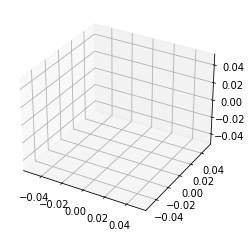

In [ ]:
from stl import mesh
from mpl_toolkits import mplot3d
from matplotlib import pyplot

# Create a new plot
figure = pyplot.figure()
axes = figure.add_subplot(projection='3d')

# Load the STL files and add the vectors to the plot
# your_mesh = mesh.Mesh.from_file('tests/stl_binary/HalfDonut.stl')
axes.add_collection3d(mplot3d.art3d.Poly3DCollection(your_mesh.vectors))

# Auto scale to the mesh size
scale = your_mesh.points.flatten()
axes.auto_scale_xyz(scale, scale, scale)

# Show the plot to the screen
pyplot.show()

# My mesh

In [ ]:
import numpy as np

In [ ]:
VERTICE_COUNT = 4
dat2 = numpy.zeros(VERTICE_COUNT, dtype=mesh.Mesh.dtype)


In [ ]:
dat2

array([([0., 0., 0.], [[0., 0., 0.], [0., 0., 0.], [0., 0., 0.]], [0]),
       ([0., 0., 0.], [[0., 0., 0.], [0., 0., 0.], [0., 0., 0.]], [0]),
       ([0., 0., 0.], [[0., 0., 0.], [0., 0., 0.], [0., 0., 0.]], [0]),
       ([0., 0., 0.], [[0., 0., 0.], [0., 0., 0.], [0., 0., 0.]], [0])],
      dtype=[('normals', '<f4', (3,)), ('vectors', '<f4', (3, 3)), ('attr', '<u2', (1,))])

In [ ]:
dat2.shape

(4,)

# Triangled mesh

Right-hand rule

In [ ]:
dat2[0] = ([1., 1., 1.], [[1., 0., 0.], [0., 1., 0.], [0., 0., 1.]], [0])

In [ ]:
dat2[1] = ([-1., 1., 1.], [[-1., 0., 0.], [0., 0, 1], [0., 1, 0]], [0])

In [ ]:
dat2[2] = ([0., 0, -1], [[-1., 0., 0.], [1., 0, 0.], [0., 0, 1]], [0])

In [ ]:
dat2

array([([ 1.,  1.,  1.], [[ 1.,  0.,  0.], [ 0.,  1.,  0.], [ 0.,  0.,  1.]], [0]),
       ([-1.,  1.,  1.], [[-1.,  0.,  0.], [ 0.,  0.,  1.], [ 0.,  1.,  0.]], [0]),
       ([ 0.,  0., -1.], [[-1.,  0.,  0.], [ 1.,  0.,  0.], [ 0.,  0.,  1.]], [0]),
       ([ 0.,  0.,  0.], [[ 0.,  0.,  0.], [ 0.,  0.,  0.], [ 0.,  0.,  0.]], [0])],
      dtype=[('normals', '<f4', (3,)), ('vectors', '<f4', (3, 3)), ('attr', '<u2', (1,))])

In [ ]:
my_mesh = mesh.Mesh(dat2, remove_empty_areas=False)

In [ ]:
my_mesh.normals

array([[ 1.,  1.,  1.],
       [-1.,  1.,  1.],
       [ 0., -2.,  0.],
       [ 0.,  0.,  0.]], dtype=float32)

In [ ]:
my_mesh.v0

array([[ 1.,  0.,  0.],
       [-1.,  0.,  0.],
       [-1.,  0.,  0.],
       [ 0.,  0.,  0.]], dtype=float32)

In [ ]:
my_mesh.v1

array([[0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 0.]], dtype=float32)

In [ ]:
my_mesh.v2

array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 0.]], dtype=float32)

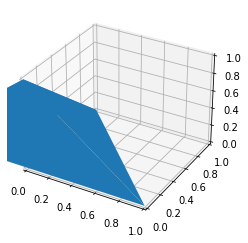

In [ ]:
from stl import mesh
from mpl_toolkits import mplot3d
from matplotlib import pyplot

# Create a new plot
figure = pyplot.figure()
axes = figure.add_subplot(projection='3d')

# Load the STL files and add the vectors to the plot
# your_mesh = mesh.Mesh.from_file('tests/stl_binary/HalfDonut.stl')
axes.add_collection3d(mplot3d.art3d.Poly3DCollection(my_mesh.vectors))

# Auto scale to the mesh size
# scale = your_mesh.points.flatten()
# axes.auto_scale_xyz(scale, scale, scale)

# Show the plot to the screen
pyplot.show()